In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 


Relevant website:
https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113

In [ ]:
## Load data

In [2]:
data = pd.read_excel('/Users/hansangjun/Desktop/Springboard/Capstone2/telco_data/Telco_customer_churn.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [4]:
## 
data = data.drop(columns=['Count', 'Lat Long', 'Latitude', 'Longitude', 'Country', 'State', 'CustomerID', 'Churn Value'])
data['Zip Code'] = data['Zip Code'].astype(object)


In [5]:
# put yes as 1 and no as 0. and change the y type to int.    
data['Churn Label'].replace("Yes", 1, inplace=True)
data['Churn Label'].replace("No", 0, inplace=True)
print(data['Churn Label'])

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Label, Length: 7043, dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   object 
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract           7043 

In [ ]:
## explore data

0    5174
1    1869
Name: Churn Label, dtype: int64


Text(0.5, 1.0, 'Count Churn')

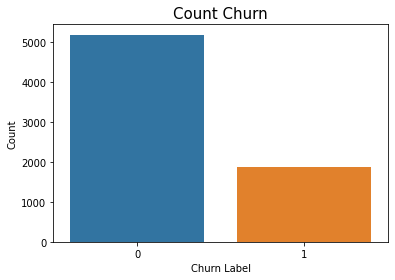

In [7]:
# Column 'Churn Label' will be out dependent variable.
print(data['Churn Label'].value_counts())
p = sns.countplot(x="Churn Label",
                data=data)

p.set_xlabel("Churn Label", fontsize = 10)
p.set_ylabel("Count", fontsize = 10)
p.set_title("Count Churn", fontsize = 15)

In [8]:
# percentage of yes and no
len_no = len(data[data['Churn Label'] == 0])
len_yes = len(data[data['Churn Label'] == 1])

percentage_no = (len_no / (len_no + len_yes)) * 100
percentage_yes = 100 - percentage_no

print (f"Percentage of the customer remained with the company is {percentage_no}.")
print (f"Percentage of the customer left the company this quarter is {percentage_yes}.")

Percentage of the customer remained with the company is 73.4630129206304.
Percentage of the customer left the company this quarter is 26.536987079369595.


In [10]:
## Mean group by 'Churn Label'
data.groupby('Churn Label').mean()

,Tenure Months,Monthly Charges,Churn Score,CLTV
Churn Label,,,,
0,37.569965,61.265124,50.098183,4490.921337
1,17.979133,74.441332,82.510433,4149.414660


In [7]:
## Here are more categorical variables
data.select_dtypes(include=[np.object])

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Reason
0,Los Angeles,90003,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Competitor made better offer
1,Los Angeles,90005,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Moved
2,Los Angeles,90006,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Moved
3,Los Angeles,90010,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Moved
4,Los Angeles,90015,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),1419.4,NaN
7039,Adelanto,92301,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,NaN
7040,Amboy,92304,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,NaN
7041,Angelus Oaks,92305,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,NaN


In [9]:
## a quick data wrangling - Align value of category.
dtype_object = []

g = data.columns.to_series().groupby(data.dtypes).groups

for k, v in g.items():
    if k == object:
        for i in range(len(v)):
            dtype_object.append(v[i])

for i in range(len(dtype_object)):
    print("####" + dtype_object[i] + "####")
    print(data[dtype_object[i]].value_counts())
    print(" ")


####City####
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
North Fork         4
Ojai               4
Escalon            4
Wildomar           4
Taylorsville       4
Name: City, Length: 1129, dtype: int64
 
####Zip Code####
91915    5
92054    5
92036    5
91105    5
91104    5
        ..
92555    4
92557    4
92561    4
92562    4
95423    4
Name: Zip Code, Length: 1652, dtype: int64
 
####Gender####
Male      3555
Female    3488
Name: Gender, dtype: int64
 
####Senior Citizen####
No     5901
Yes    1142
Name: Senior Citizen, dtype: int64
 
####Partner####
No     3641
Yes    3402
Name: Partner, dtype: int64
 
####Dependents####
No     5416
Yes    1627
Name: Dependents, dtype: int64
 
####Phone Service####
Yes    6361
No      682
Name: Phone Service, dtype: int64
 
####Multiple Lines####
No                  3390
Yes                 2971
No phone service     682
Name: Multiple Lines, dtype: int64
 
####Interne

In [10]:
## Change 'Total Charges'
data['Total Charges'] = data['Total Charges'].replace(" ", 0)
data['Total Charges'].value_counts()
data['Total Charges'] = data['Total Charges'].astype(float)

In [11]:
# "no phone service" and "no internet service" have to be "No"
for k, v in g.items():
    if k == object:
        for i in range(len(v)):
            data[v[i]].replace("No internet service", "No", inplace=True)
            data[v[i]].replace("No phone service", "No", inplace=True)


In [12]:
# Check whether "no phone service" and "no internet service" replaced to "No" or not.
dtype_object = []

g = data.columns.to_series().groupby(data.dtypes).groups

for k, v in g.items():
    if k == object:
        for i in range(len(v)):
            dtype_object.append(v[i])

for i in range(len(dtype_object)):
    print("####" + dtype_object[i] + "####")
    print(data[dtype_object[i]].value_counts())
    print(" ")

####City####
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
North Fork         4
Ojai               4
Escalon            4
Wildomar           4
Taylorsville       4
Name: City, Length: 1129, dtype: int64
 
####Gender####
Male      3555
Female    3488
Name: Gender, dtype: int64
 
####Senior Citizen####
No     5901
Yes    1142
Name: Senior Citizen, dtype: int64
 
####Partner####
No     3641
Yes    3402
Name: Partner, dtype: int64
 
####Dependents####
No     5416
Yes    1627
Name: Dependents, dtype: int64
 
####Phone Service####
Yes    6361
No      682
Name: Phone Service, dtype: int64
 
####Multiple Lines####
No     4072
Yes    2971
Name: Multiple Lines, dtype: int64
 
####Internet Service####
Fiber optic    3096
DSL            2421
No             1526
Name: Internet Service, dtype: int64
 
####Online Security####
No     5024
Yes    2019
Name: Online Security, dtype: int64
 
####Online Backup####
No     4614
Y

'Total Chages' has been changed to float, and categorical value has been aligned. 

In [12]:
## Here are some more mean for other categorical value
data.groupby('Gender').mean()

,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV
Gender,,,,,,,
Female,93492.784404,32.244553,65.204243,2279.918062,0.269209,58.692661,4408.477638
Male,93550.594937,32.495359,64.327482,2279.554008,0.261603,58.706048,4392.268073


In [13]:
data.groupby('Senior Citizen').mean()

,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV
Senior Citizen,,,,,,,
No,93527.410439,32.192171,61.847441,2177.023801,0.236062,57.731910,4401.943908
Yes,93493.824869,33.295972,79.820359,2810.465193,0.416813,63.698774,4391.779335


In [14]:
data.groupby('Phone Service').mean()

,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV
Phone Service,,,,,,,
No,93552.136364,31.737537,42.028592,1496.033651,0.249267,57.112903,4317.146628
Yes,93518.729759,32.439082,67.199041,2363.759432,0.267096,58.869517,4409.210659


Text(0, 0.5, 'Frequency of Churn')

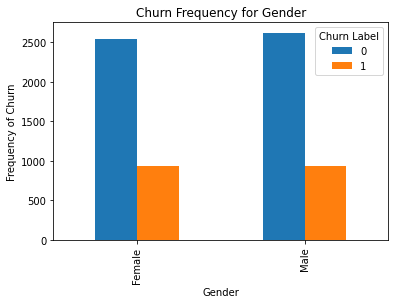

In [15]:
## Visualization
pd.crosstab(data['Gender'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Churn')

Not a good predictor

Text(0, 0.5, 'Frequency of Churn')

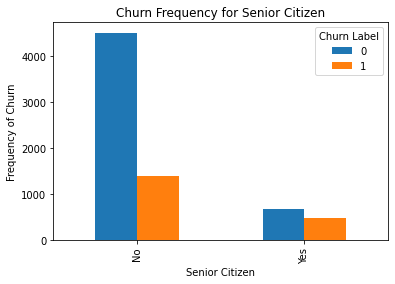

In [16]:
## Visualization
pd.crosstab(data['Senior Citizen'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency of Churn')


This is a good predictor.

Text(0, 0.5, 'Frequency of Churn')

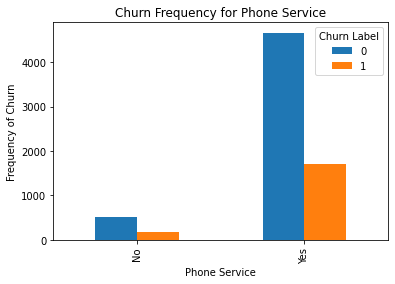

In [17]:
## Visualization
pd.crosstab(data['Phone Service'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Frequency of Churn')


'Phone Service' is a good predictor.

Text(0, 0.5, 'Frequency of Churn')

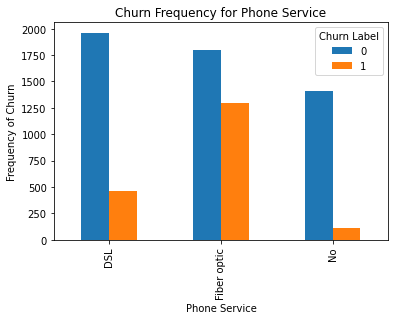

In [18]:
## Visualization
pd.crosstab(data['Internet Service'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Frequency of Churn')


'Internet Service' can be a good predictor.

In [13]:
## Create dummy variables
g = data.columns.to_series().groupby(data.dtypes).groups

cat_vars = []

for k, v in g.items():
    if k == object:
        for i in range(len(v)):
            cat_vars.append(v[i])

for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]


In [14]:
data_final = data[to_keep]
print(data_final.columns)

Index(['Zip Code', 'Tenure Months', 'Monthly Charges', 'Total Charges',
       'Churn Label', 'Churn Score', 'CLTV', 'City_Acampo', 'City_Acton',
       'City_Adelanto',
       ...
       'Churn Reason_Lack of self-service on Website',
       'Churn Reason_Limited range of services',
       'Churn Reason_Long distance charges', 'Churn Reason_Moved',
       'Churn Reason_Network reliability',
       'Churn Reason_Poor expertise of online support',
       'Churn Reason_Poor expertise of phone support',
       'Churn Reason_Price too high', 'Churn Reason_Product dissatisfaction',
       'Churn Reason_Service dissatisfaction'],
      dtype='object', length=1192)


In [16]:
X = data_final.loc[:, data_final.columns != 'Churn Label']
y = data_final.loc[:, data_final.columns == 'Churn Label']
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

Note: Now it's a perfect balanced data. It only over-sampled on the training data. None of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

In [17]:
from sklearn.linear_model import LogisticRegression

# perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [18]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
score = log_reg.score(X_test, y_test)
f"Accuracy of logistic regression classifier on test set is {score}." # model is perfect when it close to 1.

'Accuracy of logistic regression classifier on test set is 0.9157595835305253.'

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # 1480 + 79 is correct prediction, and 99 + 455 are not correct.

array([[1480,   79],
       [  99,  455]])

In [21]:
#
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1559
           1       0.85      0.82      0.84       554

    accuracy                           0.92      2113
   macro avg       0.89      0.89      0.89      2113
weighted avg       0.91      0.92      0.92      2113



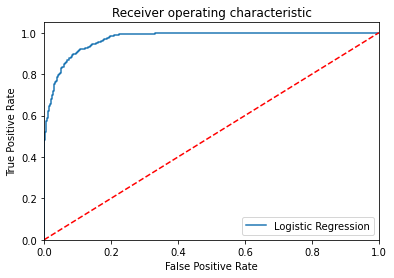

In [27]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

A good classifier stays as far away from that red dotted line as possible (toward the top-left corner)